In [43]:
from keras.datasets import reuters
#Reuters data sets
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [31]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [32]:
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [33]:
len(word_index)

30979

In [34]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
print()
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [35]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# ===>> same as to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [47]:
#Our purpose is to classify into 46 category
model = models.Sequential()
model.add(layers.Dense(1000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(546, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_label = one_hot_train_labels[1000:]

In [49]:
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.9)

Train on 898 samples, validate on 8084 samples
Epoch 1/20
898/898 [==============================] - 7s 8ms/step - loss: 3.4358 - acc: 0.2216 - val_loss: 2.9819 - val_acc: 0.4707
Epoch 2/20
898/898 [==============================] - 4s 4ms/step - loss: 2.6971 - acc: 0.4332 - val_loss: 2.7896 - val_acc: 0.5597
Epoch 3/20
898/898 [==============================] - 4s 4ms/step - loss: 2.2393 - acc: 0.6915 - val_loss: 1.7814 - val_acc: 0.5761
Epoch 4/20
898/898 [==============================] - 4s 4ms/step - loss: 1.1944 - acc: 0.7205 - val_loss: 1.5452 - val_acc: 0.6650
Epoch 5/20
898/898 [==============================] - 4s 4ms/step - loss: 0.7848 - acc: 0.8163 - val_loss: 2.2285 - val_acc: 0.4294
Epoch 6/20
898/898 [==============================] - 4s 4ms/step - loss: 1.0968 - acc: 0.6670 - val_loss: 1.5587 - val_acc: 0.6817
Epoch 7/20
898/898 [==============================] - 4s 4ms/step - loss: 0.5082 - acc: 0.9076 - val_loss: 1.3628 - val_acc: 0.7088
Epoch 8/20
898/898 [=========

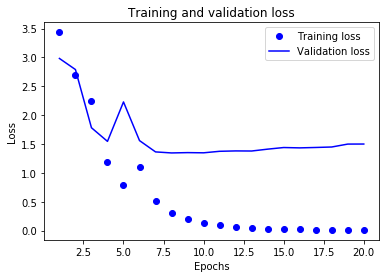

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

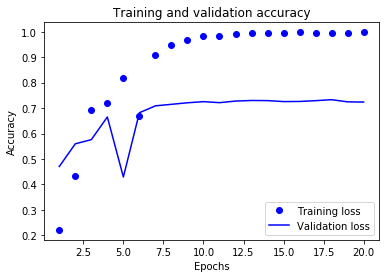

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()